In [1]:
from keras.datasets import fashion_mnist

In [2]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
import numpy as np

In [5]:
model.fit(train_x.astype(np.float32),train_y.astype(np.float32),epochs=10,validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 10s 6ms/step - loss: 3.3435 - accuracy: 0.6827 - val_loss: 0.8325 - val_accuracy: 0.6989
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7470 - accuracy: 0.7407 - val_loss: 0.7362 - val_accuracy: 0.7780
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6316 - accuracy: 0.7659 - val_loss: 0.6821 - val_accuracy: 0.7675
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5547 - accuracy: 0.7974 - val_loss: 0.5606 - val_accuracy: 0.8108
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5287 - accuracy: 0.8153 - val_loss: 0.5212 - val_accuracy: 0.8309
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5196 - accuracy: 0.8233 - val_loss: 0.5846 - val_accuracy: 0.8091
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5028 - accuracy: 0.8271 - val_loss: 0.5073 - val_accura

In [6]:
loss,acc = model.evaluate(test_x,test_y)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5824 - accuracy: 0.7975
0.5823503136634827
0.7975000143051147


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print(label)
        plt.show()
    return label

9


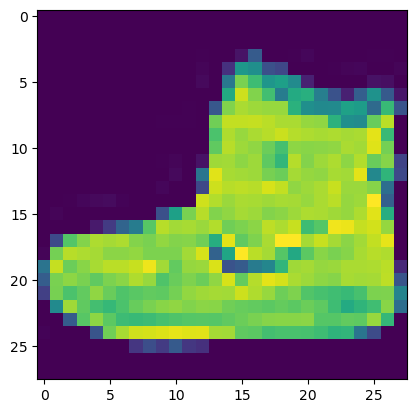

0


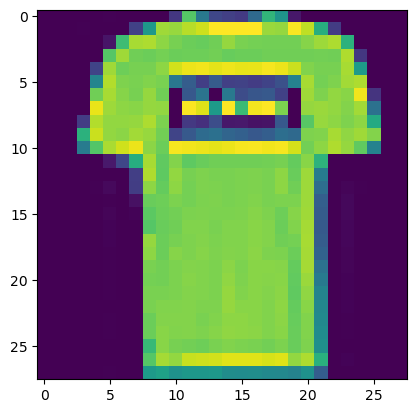

3


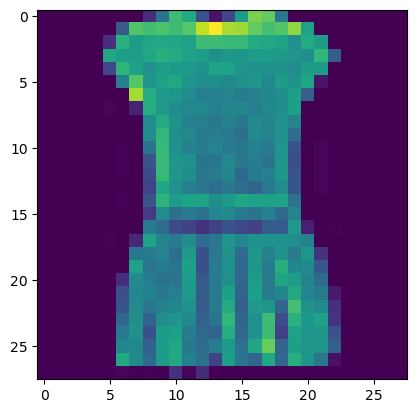

2


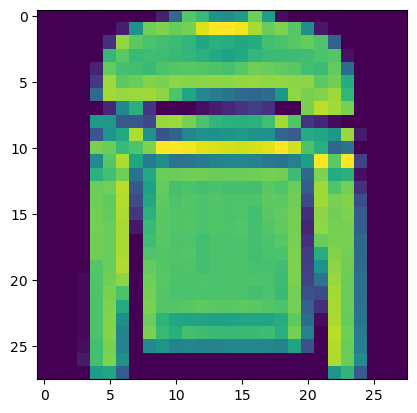

7


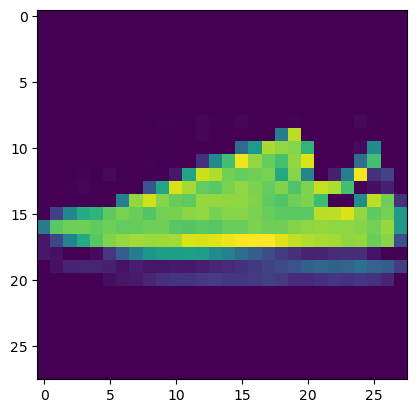

5


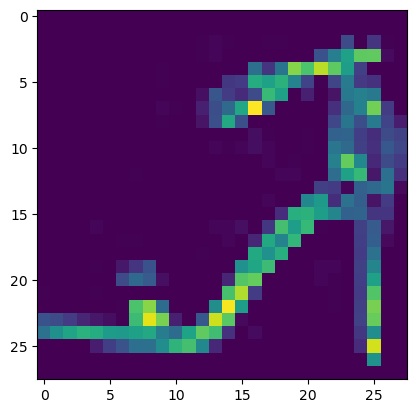

1


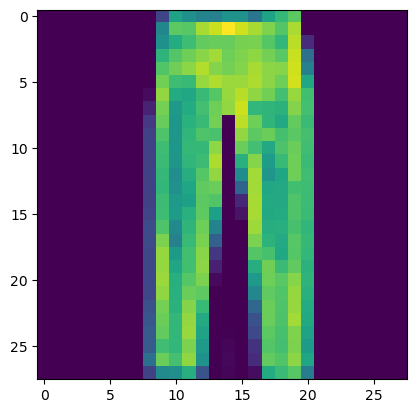

6


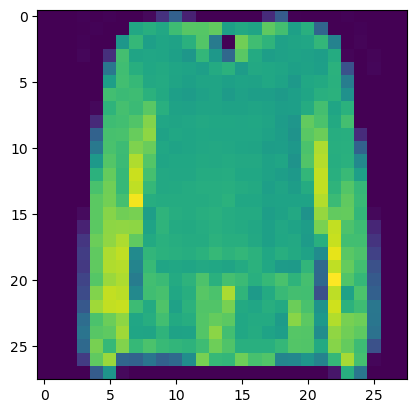

4


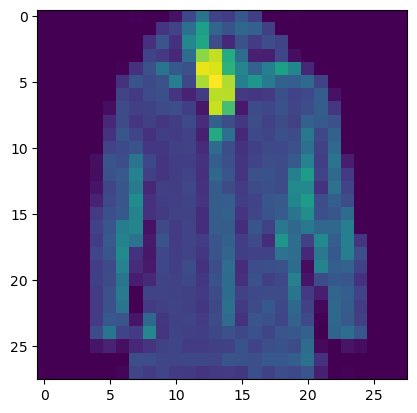

8


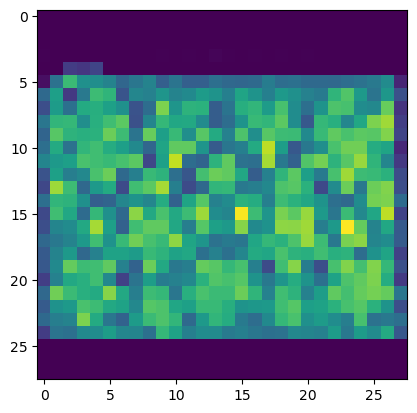

In [9]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [10]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(test_x[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

1/1 [==============================] - 0s 192ms/step
trouser


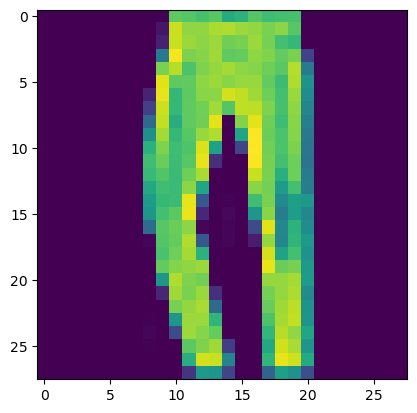

In [11]:
predict(5)

1/1 [==============================] - 0s 52ms/step
pullover


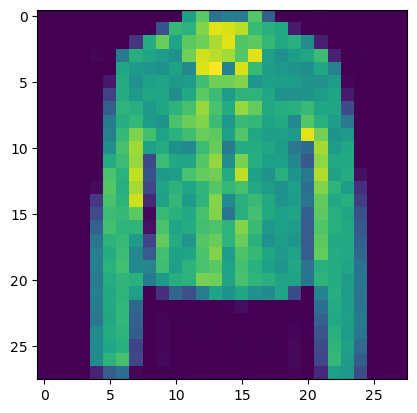

1/1 [==============================] - 0s 57ms/step
sandal


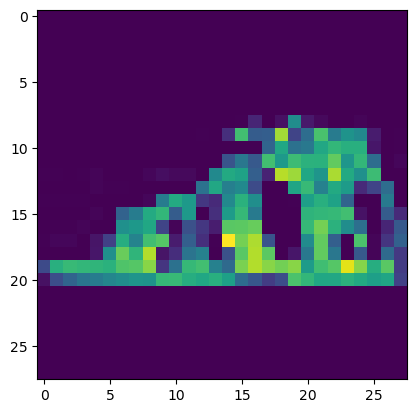

1/1 [==============================] - 0s 59ms/step
sneaker


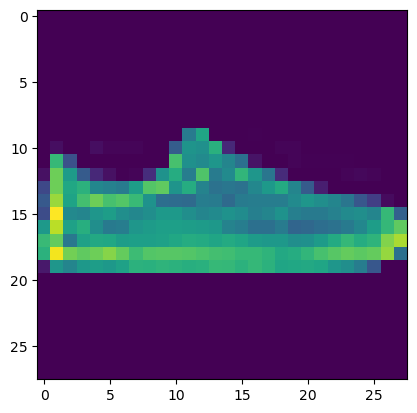

1/1 [==============================] - 0s 49ms/step
dress


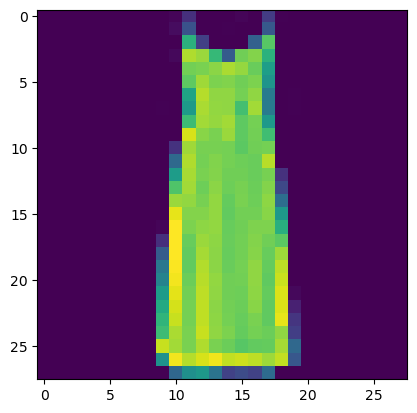

1/1 [==============================] - 0s 61ms/step
coat


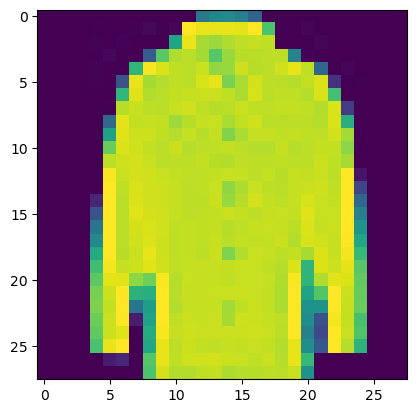

1/1 [==============================] - 0s 57ms/step
trouser


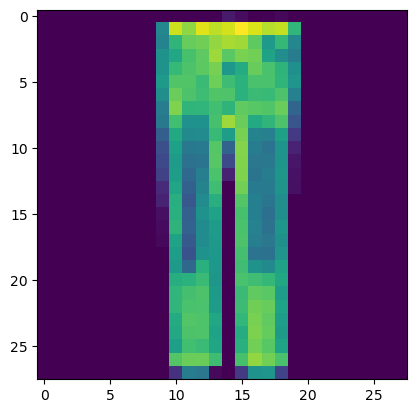

1/1 [==============================] - 0s 48ms/step
pullover


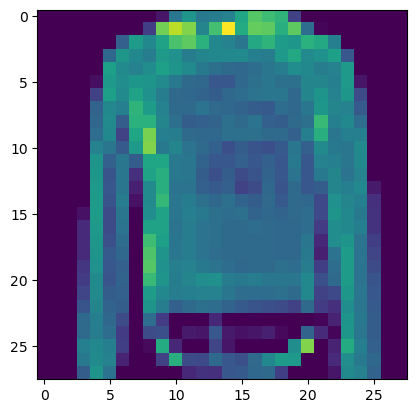

1/1 [==============================] - 0s 55ms/step
pullover


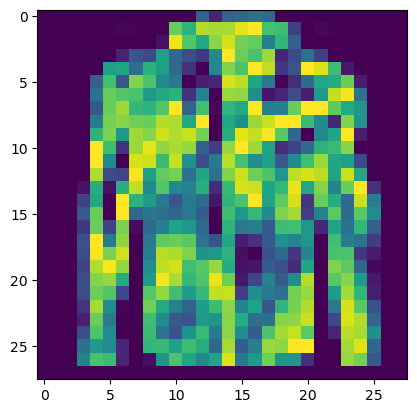

1/1 [==============================] - 0s 53ms/step
bag


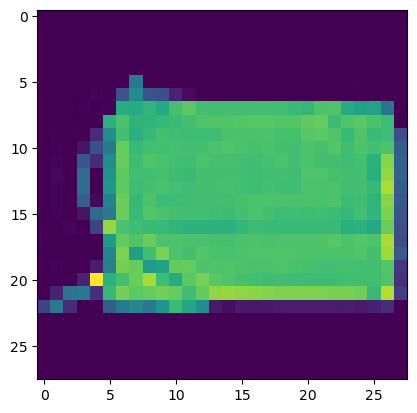

1/1 [==============================] - 0s 50ms/step
t_shirt


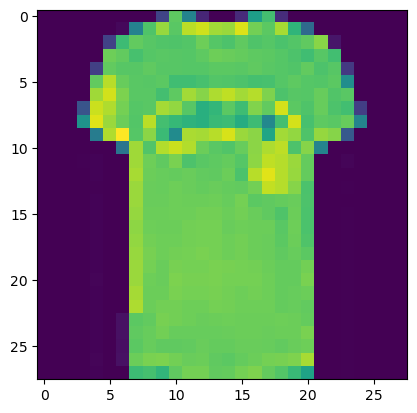

In [12]:
for i in range(10,20):
    predict(i)